In [58]:
#Import Library

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
#Extracting Data from Yahoo Finance

start = '2015-04-30'
end = '2023-05-01'

stock = yf.download('MCD', start, end)
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-30,96.650002,97.370003,96.410004,96.550003,78.232681,8300300
2015-05-01,96.730003,97.970001,96.730003,97.800003,79.245529,6280300
2015-05-04,96.570000,98.629997,96.050003,96.129997,77.892357,8426300
2015-05-05,96.389999,96.470001,95.570000,96.129997,77.892357,7637000
2015-05-06,96.099998,96.660004,95.879997,96.389999,78.103043,6614500


In [60]:
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,292.829987,293.429993,291.709991,293.200012,291.651886,2995200
2023-04-25,295.000000,295.000000,289.429993,291.510010,289.970795,5845200
2023-04-26,289.980011,291.500000,289.760010,289.760010,288.230042,3290000
2023-04-27,290.720001,295.049988,290.000000,294.720001,293.163849,3142300
2023-04-28,294.829987,296.179993,293.910004,295.750000,294.188385,2837200


Text(0, 0.5, 'Price (USD)')

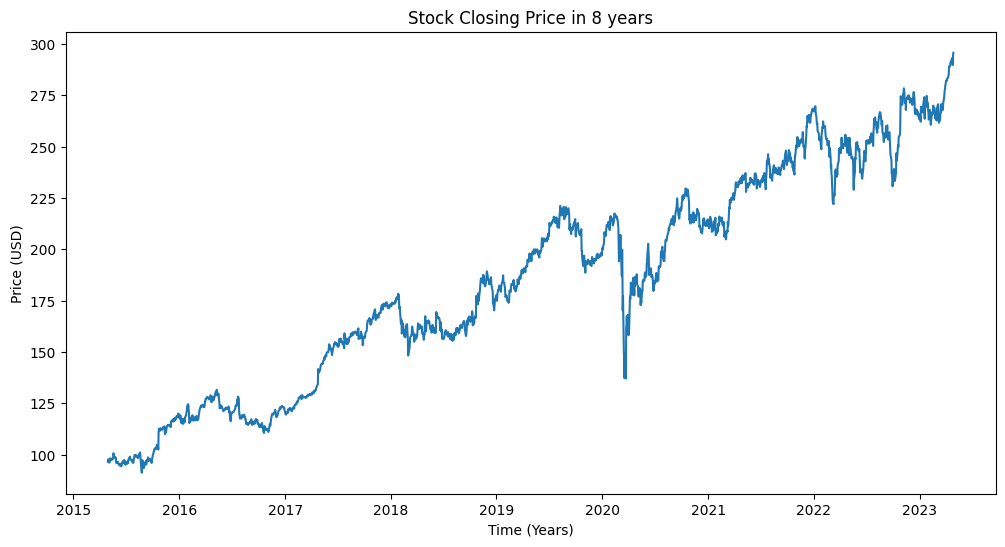

In [61]:
#Closing Price Data Plotting

plt.figure(figsize=(12,6))
plt.plot(stock.Close)
plt.title('Stock Closing Price in 8 years')
plt.xlabel('Time (Years)')
plt.ylabel('Price (USD)')

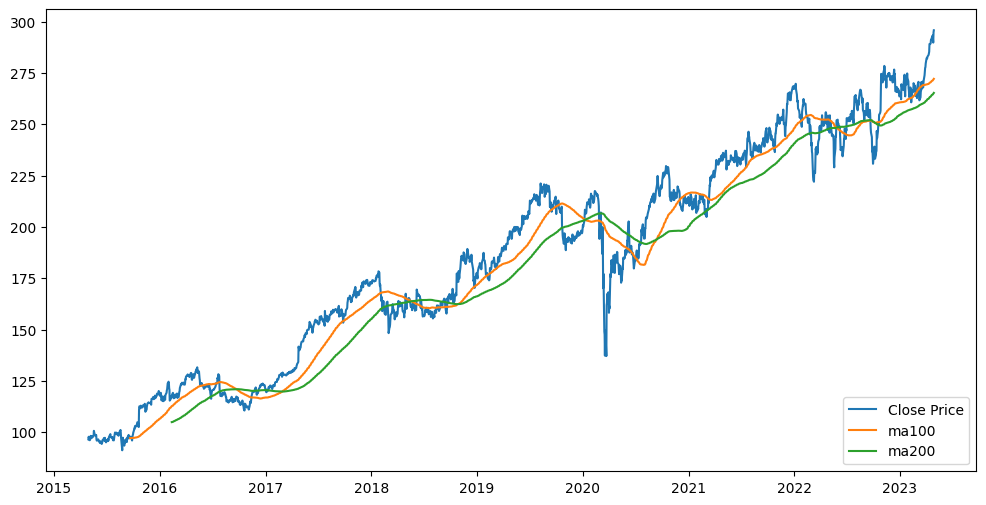

In [62]:
#Moving Average 100 and Moving Average 200 indicators

ma100 = stock.Close.rolling(100).mean()
ma200 = stock.Close.rolling(200).mean()

plt.figure(figsize = (12, 6))
plt.plot(stock.Close)
plt.plot(ma100)
plt.plot(ma200)
plt.legend(['Close Price', 'ma100', 'ma200'], loc='lower right')

In [63]:
stock.shape

(2014, 6)

In [64]:
# Data splitting into Training and Testing with 80:20 ratio

datalen = int(len(stock))
trainlen = int(len(stock)*0.80)

train = pd.DataFrame(stock['Close'][0 : trainlen])
test = pd.DataFrame(stock['Close'][trainlen : datalen])

print(train.shape)
print(test.shape)

(1611, 1)
(403, 1)


In [65]:
train.head()

,Close
Date,
2015-04-30,96.550003
2015-05-01,97.800003
2015-05-04,96.129997
2015-05-05,96.129997
2015-05-06,96.389999


In [66]:
train.tail()

,Close
Date,
2021-09-15,240.979996
2021-09-16,243.210007
2021-09-17,242.490005
2021-09-20,239.089996
2021-09-21,240.500000


In [67]:
test.head()

,Close
Date,
2021-09-22,243.130005
2021-09-23,244.779999
2021-09-24,246.419998
2021-09-27,248.110001
2021-09-28,243.770004


In [68]:
test.tail()

,Close
Date,
2023-04-24,293.200012
2023-04-25,291.510010
2023-04-26,289.760010
2023-04-27,294.720001
2023-04-28,295.750000


In [69]:
#Data Preprocessing (Normalize and rescale data)

scaler = MinMaxScaler(feature_range=(0,1))
trainarray = scaler.fit_transform(train)

trainarray

array([[0.03442055],
       [0.04247779],
       [0.03171328],
       ...,
       [0.97511924],
       [0.9532035 ],
       [0.96229209]])

In [70]:
trainarray.shape

(1611, 1)

In [71]:
#Data Training

xtrain = []
ytrain = []

for i in range(100, trainarray.shape[0]):
    xtrain.append(trainarray[i-100: i])
    ytrain.append(trainarray[i, 0])

xtrain , ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

In [72]:
xtrain

array([[[0.03442055],
        [0.04247779],
        [0.03171328],
        ...,
        [0.04273557],
        [0.03764344],
        [0.04312235]],

       [[0.04247779],
        [0.03171328],
        [0.03171328],
        ...,
        [0.03764344],
        [0.04312235],
        [0.03861027]],

       [[0.03171328],
        [0.03171328],
        [0.0333892 ],
        ...,
        [0.04312235],
        [0.03861027],
        [0.03977052]],

       ...,

       [[0.92671129],
        [0.91014566],
        [0.9281939 ],
        ...,
        [0.96635297],
        [0.96538604],
        [0.97976022]],

       [[0.91014566],
        [0.9281939 ],
        [0.9338017 ],
        ...,
        [0.96538604],
        [0.97976022],
        [0.97511924]],

       [[0.9281939 ],
        [0.9338017 ],
        [0.93044986],
        ...,
        [0.97976022],
        [0.97511924],
        [0.9532035 ]]])

In [73]:
xtrain.shape

(1511, 100, 1)

In [74]:
ytrain

array([0.03861027, 0.03977052, 0.03919042, ..., 0.97511924, 0.9532035 ,
       0.96229209])

In [75]:
ytrain.shape

(1511,)

In [76]:
#Building Long Short Term Memory (LSTM) Model

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 100)          40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [77]:
#Running the Model in 3 Iteration

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size= 1, epochs=3)

Epoch 1/3
1511/1511 [==============================] - 102s 66ms/step - loss: 0.0023
Epoch 2/3
1511/1511 [==============================] - 97s 64ms/step - loss: 7.5119e-04
Epoch 3/3
1511/1511 [==============================] - 99s 65ms/step - loss: 7.2023e-04


In [78]:
#Saving Model for GUI website

model.save('StockPredict_model.h5')

In [79]:
#Data Testing

data = stock.filter(['Close'])
values = data.values
scaledtest = scaler.fit_transform(values)

testarray = scaledtest[trainlen-100: , : ]
xtest = []
ytest = data[trainlen : ]

for i in range(100, len(testarray)):
    xtest.append(testarray[i-100 : i, 0])

xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [80]:
testarray.shape

(503, 1)

In [81]:
#Data Prediction, Calculation of Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)

ypredict = model.predict(xtest)
ypredict = scaler.inverse_transform(ypredict)

mse = mean_squared_error(ytest, ypredict)
rmse = np.sqrt(mse)
rmse

13/13 [==============================] - 1s 51ms/step


3.254229196373795

In [82]:
mae = mean_absolute_error(ytest, ypredict)
mae

2.522765431747247

In [83]:
ytest.head()

,Close
Date,
2021-09-22,243.130005
2021-09-23,244.779999
2021-09-24,246.419998
2021-09-27,248.110001
2021-09-28,243.770004


In [84]:
ypredict

array([[241.8232 ],
       [243.78809],
       [245.81232],
       [247.57887],
       [249.19925],
       [246.7436 ],
       [245.79713],
       [243.53647],
       [243.93506],
       [244.52953],
       [246.23875],
       [248.17743],
       [249.61127],
       [249.53513],
       [248.52827],
       [246.69014],
       [244.77875],
       [245.4698 ],
       [244.53004],
       [244.1227 ],
       [244.40195],
       [242.56715],
       [242.85211],
       [241.22145],
       [239.77795],
       [238.72577],
       [242.60446],
       [246.28874],
       [247.47731],
       [250.81868],
       [251.08745],
       [251.52534],
       [253.65767],
       [255.34267],
       [254.73836],
       [253.98576],
       [254.05731],
       [252.21492],
       [251.83742],
       [253.45734],
       [253.92357],
       [254.12492],
       [254.66533],
       [253.81516],
       [254.41904],
       [256.22296],
       [257.91415],
       [253.60983],
       [251.79678],
       [247.67108],


<ipython-input-85-ef6ed55d15e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['ypredict'] = ypredict


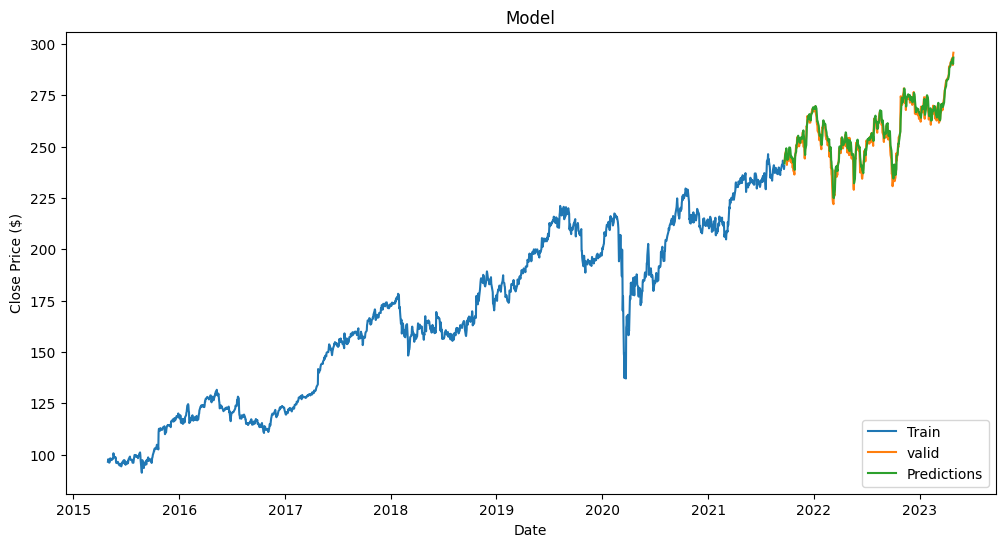

In [85]:
#Predicted Price valid with Actual Price plotting

valid = data[trainlen : ]
valid['ypredict'] = ypredict
plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'ypredict']])
plt.legend(['Train', 'valid', 'Predictions'], loc='lower right')
plt.show()